<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Clustering_Trial_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data=files.upload()

Saving Data.csv to Data.csv


In [ ]:
import io

In [53]:
data=pd.read_csv(io.BytesIO(data['Data.csv']),sep=';')

KeyError: ignored

In [54]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29/11/2016,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29/11/2016,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29/11/2016,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29/11/2016,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29/11/2016,3.39,17850,United Kingdom


In [55]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
94,536378,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,6,29/11/2016,2.55,14688,United Kingdom
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,29/11/2016,2.55,14688,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,29/11/2016,0.42,14688,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,29/11/2016,0.55,14688,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,29/11/2016,0.55,14688,United Kingdom


In [60]:
print("Data yang na", data.isna().sum())

Data yang na InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    99 non-null     int64  
 1   StockCode    99 non-null     object 
 2   Description  99 non-null     object 
 3   Quantity     99 non-null     int64  
 4   InvoiceDate  99 non-null     object 
 5   UnitPrice    99 non-null     float64
 6   CustomerID   99 non-null     int64  
 7   Country      99 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [64]:
data.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [66]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [67]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,99.000000,99.000000,99.000000,99.000000
mean,536371.808081,12.989899,3.303939,15425.080808
std,4.014455,16.937758,2.609793,2330.620254
min,536365.000000,2.000000,0.420000,12583.000000
25%,536368.500000,6.000000,1.770000,13047.000000
50%,536373.000000,6.000000,2.750000,14688.000000
75%,536375.000000,12.000000,4.250000,17850.000000
max,536378.000000,120.000000,18.000000,17850.000000


In [68]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [73]:
import seaborn as sns

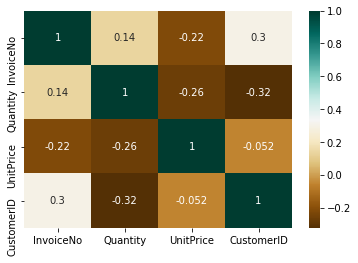

In [78]:
PlotKorelasi = sns.heatmap(data.corr(),cmap='BrBG',annot=True)

In [79]:
data1=data.copy()

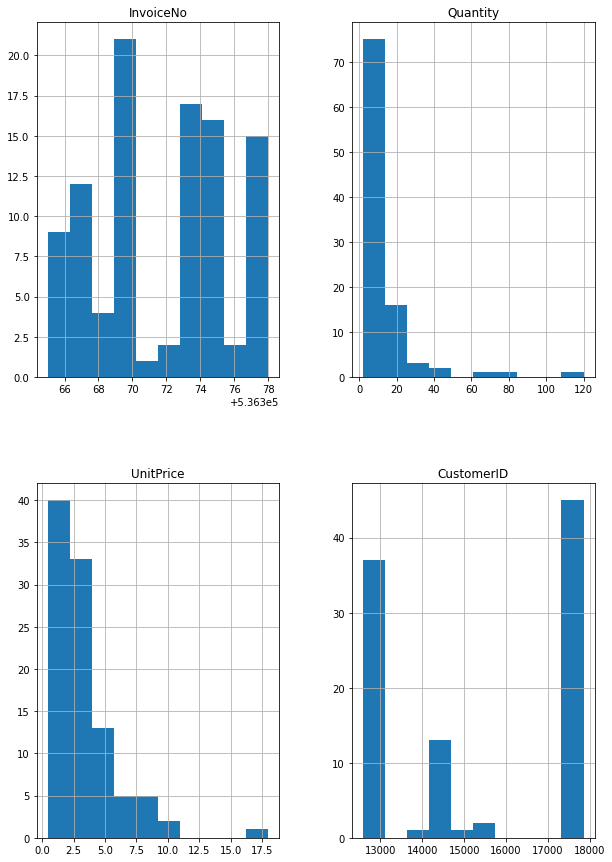

In [88]:
BarPlot=data.hist(figsize=(10,15))

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [92]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=fc48e3e62e13d7b2ed36396bfa46e98d351742743e48a6f8b94858d4cefb9a12
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [95]:
from pandasql  import sqldfb

In [130]:
datanew=sqldf("SELECT * FROM data1;")
datanew

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29/11/2016,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29/11/2016,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29/11/2016,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29/11/2016,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29/11/2016,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
94,536378,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,6,29/11/2016,2.55,14688,United Kingdom
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,29/11/2016,2.55,14688,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,29/11/2016,0.42,14688,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,29/11/2016,0.55,14688,United Kingdom


In [102]:
sales = sqldf("SELECT CustomerID, COUNTRY, COUNT(COUNTRY) AS Sales_Country, SUM(UNITPRICE) AS Total_Revenue, SUM(QUANTITY) AS Total_Items_Sold FROM data1 WHERE UNITPRICE >= '0' group by CustomerID;")
sales.head(10)

,CustomerID,Country,Sales_Country,Total_Revenue,Total_Items_Sold
0,12583,France,20,55.29,449
1,13047,United Kingdom,17,83.29,101
2,13748,United Kingdom,1,2.55,80
3,14688,United Kingdom,13,24.32,260
4,15100,United Kingdom,1,10.95,32
5,15291,United Kingdom,2,6.00,112
6,17850,United Kingdom,45,144.69,252


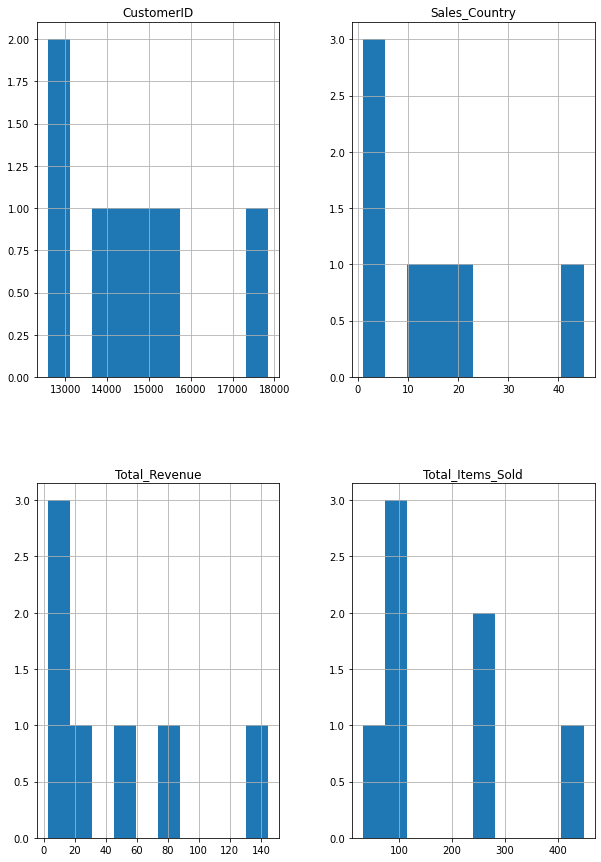

In [103]:
Sales_Plot=sales.hist(figsize=(10,15))

In [107]:
top_sales=sqldf("SELECT * from sales order by Total_Items_Sold desc;")
top_sales

,CustomerID,Country,Sales_Country,Total_Revenue,Total_Items_Sold
0,12583,France,20,55.29,449
1,14688,United Kingdom,13,24.32,260
2,17850,United Kingdom,45,144.69,252
3,15291,United Kingdom,2,6.00,112
4,13047,United Kingdom,17,83.29,101
5,13748,United Kingdom,1,2.55,80
6,15100,United Kingdom,1,10.95,32


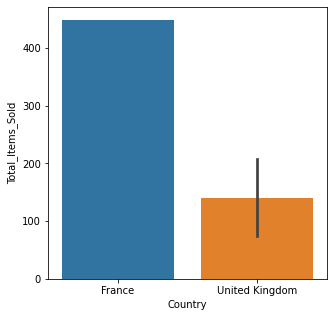

In [115]:
plt.figure(figsize=(5,5))
sns.barplot(x="Country",y="Total_Items_Sold", data=sales,label=True)

In [129]:
sales

,CustomerID,Country,Sales_Country,Total_Revenue,Total_Items_Sold
0,12583,France,20,55.29,449
1,13047,United Kingdom,17,83.29,101
2,13748,United Kingdom,1,2.55,80
3,14688,United Kingdom,13,24.32,260
4,15100,United Kingdom,1,10.95,32
5,15291,United Kingdom,2,6.00,112
6,17850,United Kingdom,45,144.69,252


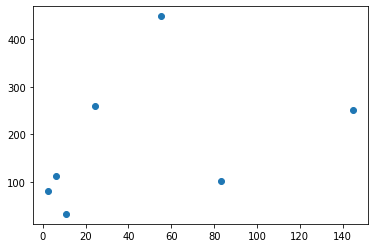

In [128]:
plt.scatter(sales['Total_Revenue'],sales['Total_Items_Sold'])

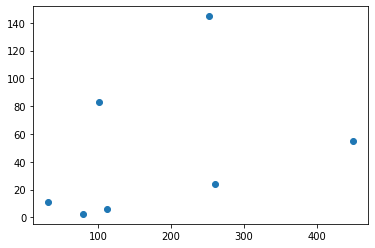

In [135]:
clustering = sqldf("SELECT Total_Items_Sold,Total_Revenue FROM clustering WHERE Total_Revenue < '30000' AND Total_Items_Sold < 100000;")
plt.scatter(clustering["Total_Items_Sold"], clustering["Total_Revenue"])

In [136]:
clustering

,Total_Items_Sold,Total_Revenue
0,449,55.29
1,260,24.32
2,252,144.69
3,112,6.00
4,101,83.29
5,80,2.55
6,32,10.95


In [137]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clustering)
    Sum_of_squared_distances.append(km.inertia_)

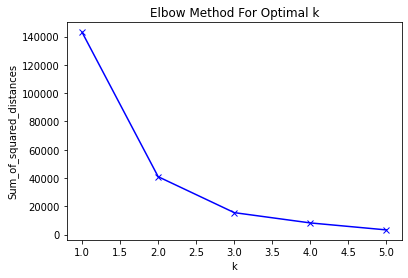

[[ 74.66666667   6.5       ]
 [252.         144.69      ]
 [449.          55.29      ]
 [260.          24.32      ]
 [101.          83.29      ]]


In [138]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print(km.cluster_centers_)

In [139]:
km = KMeans(n_clusters=3)
points = clustering[["Total_Items_Sold", "Total_Revenue"]].to_numpy()
y_km = km.fit_predict(points)
y_km

array([2, 1, 1, 0, 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Clustering the Customers')

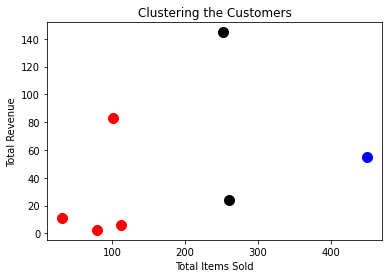

In [140]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')

plt.xlabel('Total Items Sold')
plt.ylabel('Total Revenue')
plt.title('Clustering the Customers')

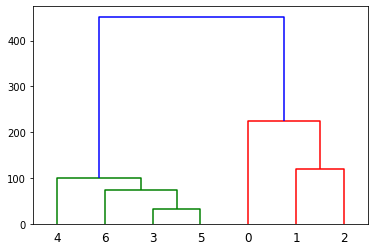

In [141]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

In [143]:
clustering["cluster"] = km.labels_
clustering.head(10)

,Total_Items_Sold,Total_Revenue,cluster
0,449,55.29,2
1,260,24.32,1
2,252,144.69,1
3,112,6.00,0
4,101,83.29,0
5,80,2.55,0
6,32,10.95,0
